<a href="https://colab.research.google.com/github/Richofedhias/Data_Survive_Titanic/blob/main/Data_Survive_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as pp
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn import tree

In [37]:
dtrain = pd.read_csv('sample_data/train.csv')

In [38]:
dtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
dtrain = dtrain.drop(['PassengerId'], axis = 1)
dtrain = dtrain.drop(['Name'], axis = 1)
dtrain = dtrain.drop(['Ticket'], axis = 1)
dtrain = dtrain.drop(['Cabin'], axis = 1)
# Untuk Drop Tabel

In [40]:
dtrain['Embarked'].describe()
# Untuk Menjelaskan kolomnya

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [41]:
dtrain['Sex'].isna().sum()
# Untuk Menjelaskan data yang kosong

0

In [42]:
dtrain.corr(method='spearman')
# Mencari Korelasi antar kolom

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


In [43]:
dtrain = dtrain[dtrain['Embarked'].notna()]
# Untuk Mengisi Data yang kosong

In [44]:
dtrain = dtrain[dtrain['Age'].notna()]
# Untuk Mengisi Data yang kosong

In [45]:
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [46]:
dtrain["Age"].fillna(method="ffill")

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 712, dtype: float64

In [47]:
dtrain['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [48]:
dtrain['Age'] = dtrain["Age"].astype(np.int64)
# Convert to integer

In [49]:
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [50]:
dtrain["Sex"].unique()

array(['male', 'female'], dtype=object)

In [51]:
dtrain.loc[dtrain['Sex'] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [52]:
dtrain = dtrain[dtrain['Sex'] != 0]

In [53]:
label_enc = LabelEncoder()
dtrain["Sex"] = label_enc.fit_transform(dtrain["Sex"])

In [54]:
label_enc = LabelEncoder()
dtrain["Embarked"] = label_enc.fit_transform(dtrain["Embarked"])

In [55]:
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [56]:
dtrain['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [57]:
arr_fare = np.array(dtrain["Fare"])

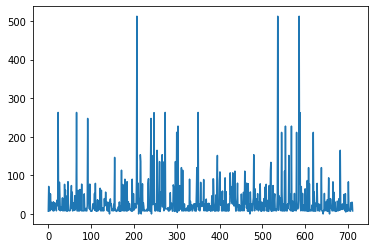

In [58]:
pp.plot(arr_fare)
pp.show()

In [59]:
for i in range(len(arr_fare)):
  if arr_fare[i] < 8 :
    arr_fare[i] = 0
  elif arr_fare[i] < 16 :
    arr_fare[i] = 1
  elif arr_fare[i] < 33 :
    arr_fare[i] = 2
  else:
    arr_fare[i] = 3

In [60]:
arr_fare

array([0., 3., 0., 3., 1., 3., 2., 1., 2., 2., 2., 1., 2., 0., 2., 2., 2.,
       2., 1., 1., 3., 2., 2., 3., 2., 1., 3., 3., 1., 2., 1., 1., 2., 3.,
       0., 2., 3., 0., 3., 2., 3., 1., 0., 2., 3., 0., 3., 2., 1., 1., 0.,
       1., 1., 3., 3., 1., 3., 0., 2., 1., 1., 1., 3., 1., 1., 3., 3., 1.,
       1., 0., 3., 2., 0., 3., 3., 2., 2., 0., 3., 1., 0., 0., 0., 0., 3.,
       1., 1., 1., 1., 0., 0., 2., 3., 2., 3., 2., 1., 3., 1., 0., 0., 0.,
       0., 1., 2., 1., 1., 2., 3., 1., 3., 0., 1., 0., 1., 3., 0., 3., 2.,
       1., 1., 3., 1., 1., 3., 0., 1., 2., 1., 0., 1., 3., 2., 2., 3., 3.,
       2., 1., 0., 2., 0., 2., 1., 0., 2., 3., 2., 2., 1., 0., 1., 1., 0.,
       2., 2., 3., 1., 1., 1., 0., 0., 1., 1., 1., 2., 0., 2., 0., 2., 0.,
       1., 3., 0., 2., 3., 1., 1., 1., 1., 3., 1., 1., 0., 1., 3., 0., 1.,
       2., 1., 2., 2., 1., 1., 1., 0., 0., 3., 0., 1., 3., 2., 1., 2., 2.,
       2., 1., 3., 3., 2., 2., 3., 0., 1., 3., 0., 3., 3., 0., 2., 2., 3.,
       0., 2., 2., 0., 0.

In [61]:
for i in range(len(arr_fare)):
  dtrain["Fare"][i] = arr_fare[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,0.0,2
1,1,1,0,38,1,0,3.0,0
2,1,3,0,26,0,0,0.0,2
3,1,1,0,35,1,0,3.0,2
4,0,3,1,35,0,0,1.0,2


In [63]:
dtrain['Fare'] = dtrain["Fare"].astype(np.int64)
# Convert to integer

In [64]:
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,0,2
1,1,1,0,38,1,0,3,0
2,1,3,0,26,0,0,0,2
3,1,1,0,35,1,0,3,2
4,0,3,1,35,0,0,1,2


In [67]:
X = dtrain.iloc[:,1:]
Y = dtrain.iloc[:,0]
# Split survived sama Kolom kanan Semua

In [68]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [69]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,0,2
1,1,0,38,1,0,3,0
2,3,0,26,0,0,0,2
3,1,0,35,1,0,3,2
4,3,1,35,0,0,1,2
...,...,...,...,...,...,...,...
885,3,0,39,0,5,29,1
886,2,1,27,0,0,13,2
887,1,0,19,0,0,30,2
889,1,1,26,0,0,30,0


In [70]:
# Learning Process

In [73]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [79]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
asd = clf.fit(X, Y)

In [80]:
filename = 'finalized_model.sav'
pickle.dump(asd, open(filename, 'wb'))